# Max Frequency appearance approach

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import graphviz

# Load data

In [3]:
phishing_data = pd.read_csv('phishing_final.csv')
resultTarget = phishing_data["Result"]
# resultTarget.value_counts().argmax()

In [4]:
# make copy versions:
# dataframe that will replace NaN with most frequency appearance value
phishingWithMostFrequence = phishing_data.copy(deep=True)


# Understanding dataset

In [5]:
# Display first 5 sample rows of data
phishing_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


In [6]:
# A summary table of the dataset
phishing_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,9947,9937,9957,9952,11055,11055,11055,11055,11055,9972,9976,9956,9948,9977,9950,11055,11055,11055,11055,11055,11055,9971,9934,9941,9982,9961,11055,11055,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,7262,8078,8641,8474,8649,9590,4070,7389,9002,9553,8335,5908,4833,4021,7602,8126,9426,9776,9740,10579,8918,10043,5316,6832,5244,7382,8562,6156,9505,5560


In [7]:
# Number of rows with NaN result
print(f'Number of rows without the result: {phishing_data[phishing_data.Result.isnull()].shape[0]}')

Number of rows without the result: 1054


## Observation

Result has NaN => dont know the outcome => drop row

Several columns have NaN result

In [8]:
# drop unknown result:
phishing_data = phishing_data[~phishing_data['Result'].isnull()]
phishing_data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


In [9]:
phishing_data.shape

(10001, 30)

In [10]:
phishing_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,10001,8990,8974,9019,8987,10001,10001,10001,10001,10001,9019,9028,9007,8993,9027,8997,10001,10001,10001,10001,10001,10001,9029,8991,8988,9041,9008,10001,10001,10001
unique,2,3,2,2,2,2,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,2
top,Yes,Short,Yes,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,Some links,Reported,Phish
freq,6567,7285,7811,7686,7810,8664,3688,6662,8142,8641,7546,5343,4371,3635,6892,7373,8543,8835,8799,9561,8070,9070,4816,6186,4741,6691,7728,5551,8595,5560


some missing data: 8974 ~ 10001

## Visualize the original dataframe

<Figure size 432x288 with 0 Axes>

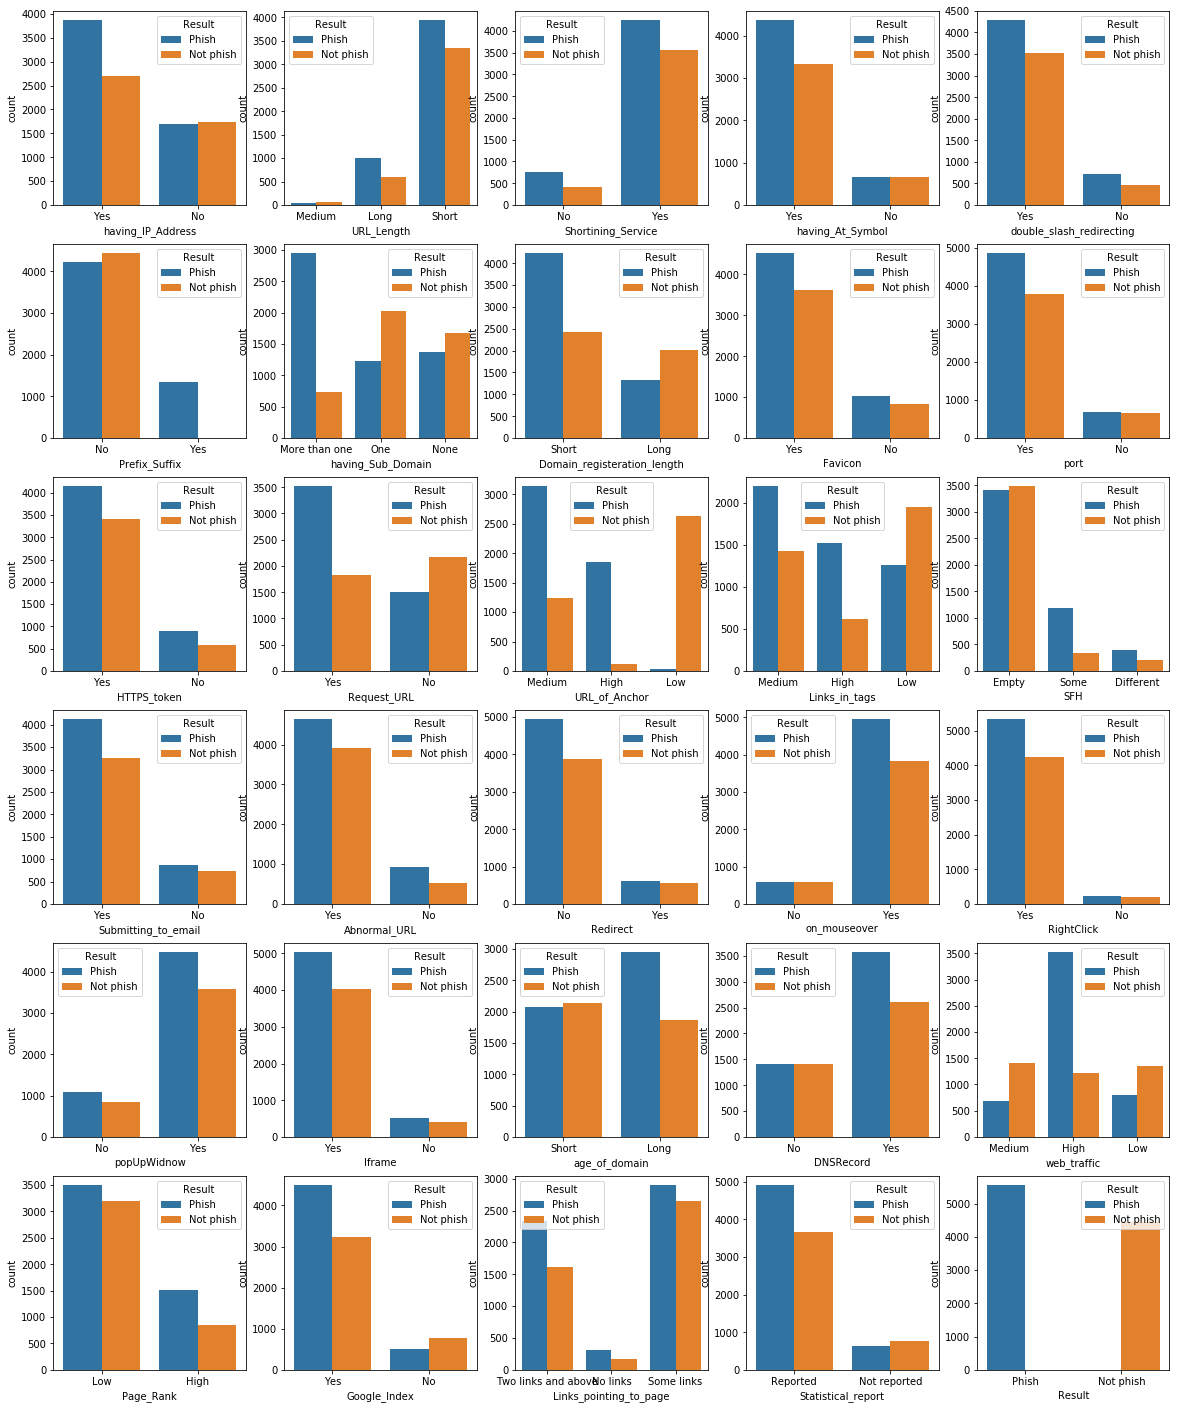

In [12]:
columns_plot = np.array(phishing_data.columns).reshape(6, 5)
plt.subplots_adjust(left  = 0.3, right = 0.9, bottom = 0.2, top = 0.9, wspace = 0.3, hspace = 0.3)

f, axes = plt.subplots(6, 5, figsize=(20, 25))

for x in range(6):
    for y in range(5):
        sns.countplot(x=columns_plot[x][y], hue='Result', data=phishing_data, ax=axes[x][y])

## from data distribution:
    Data is not bias.
    first layer entropy important features: 
        URL-Anchor, Prefix, LinkinTag, webTrafic, DomainLength...

# Preprocess 

## using max appearance frequency values

In [13]:
dataFrameFrequency = phishingWithMostFrequence


In [14]:
print(dataFrameFrequency['Result'].isnull().sum())

1054


In [19]:
# function to get column names which contain NaN values
def columnsContainNaN (df):
    result = df.columns[df.isna().any()].tolist()
    return result
# columnsContainNaN(phising_data)

In [20]:
# check statistic info of each values
for column in columnsContainNaN(dataFrameFrequency):
    print("\n",column," :")
    print(dataFrameFrequency[column].value_counts())
    print("number of NaN rows: ", dataFrameFrequency[column].isnull().sum())


 URL_Length  :
Short     8078
Long      1752
Medium     117
Name: URL_Length, dtype: int64
number of NaN rows:  1108

 Shortining_Service  :
Yes    8641
No     1296
Name: Shortining_Service, dtype: int64
number of NaN rows:  1118

 having_At_Symbol  :
Yes    8474
No     1483
Name: having_At_Symbol, dtype: int64
number of NaN rows:  1098

 double_slash_redirecting  :
Yes    8649
No     1303
Name: double_slash_redirecting, dtype: int64
number of NaN rows:  1103

 HTTPS_token  :
Yes    8335
No     1637
Name: HTTPS_token, dtype: int64
number of NaN rows:  1083

 Request_URL  :
Yes    5908
No     4068
Name: Request_URL, dtype: int64
number of NaN rows:  1079

 URL_of_Anchor  :
Medium    4833
Low       2931
High      2192
Name: URL_of_Anchor, dtype: int64
number of NaN rows:  1099

 Links_in_tags  :
Medium    4021
Low       3552
High      2375
Name: Links_in_tags, dtype: int64
number of NaN rows:  1107

 SFH  :
Empty        7602
Some         1689
Different     686
Name: SFH, dtype: int64
nu

In [23]:
# get columns contain NaN, ignore the Result column
columnNames = list(filter(lambda column: column != "Result", columnsContainNaN(phishingWithMostFrequence)))
columnNames


['URL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index']

In [24]:
# function to fill columns with the most appearance frequency value
def useFrequencyFillNaN(df,columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].value_counts().argmax()) 
        

In [25]:
# fill NaN at each columns that contain NaN, using most frequency approach
useFrequencyFillNaN(dataFrameFrequency,columnNames)
dataFrameFrequency


/Users/donbosco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,Low,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,High,Yes,Some links,Reported,Phish
3,Yes,Short,Yes,Yes,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,Medium,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish
5,Yes,Long,Yes,Yes,Yes,No,None,Long,Yes,Yes,Yes,No,Medium,Low,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,No,Low,High,Yes,No links,Not reported,Phish
6,Yes,Long,Yes,Yes,Yes,No,None,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,No,No,No,No,No,No,No,Long,No,Medium,Low,Yes,Some links,Not reported,Phish
7,Yes,Medium,No,Yes,Yes,No,One,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,No,No,No,No,Yes,No,Yes,Short,Yes,High,Low,Yes,No links,Not reported,Phish
8,Yes,Medium,Yes,Yes,Yes,No,One,Long,Yes,Yes,No,No,Medium,Low,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,Low,Low,Yes,Some links,Not reported,Phish
9,Yes,Long,Yes,Yes,Yes,No,None,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,Yes,Medium,Low,Yes,No links,Reported,Phish


In [26]:
# check result
print(dataFrameFrequency)

      having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                   Yes     Medium                 No              Yes   
1                    No     Medium                 No              Yes   
2                   Yes     Medium                 No              Yes   
3                   Yes      Short                Yes              Yes   
4                   Yes       Long                 No              Yes   
5                   Yes       Long                Yes              Yes   
6                   Yes       Long                Yes              Yes   
7                   Yes     Medium                 No              Yes   
8                   Yes     Medium                Yes              Yes   
9                   Yes       Long                Yes              Yes   
10                  Yes       Long                Yes              Yes   
11                  Yes      Short                 No               No   
12                  Yes      Short    

In [27]:
# check if dataframe target remain untouch
columnsContainNaN(dataFrameFrequency)

['Result']

# Split data

In [28]:
# drop unknown result:
dataFrameFrequency = dataFrameFrequency[~dataFrameFrequency['Result'].isnull()]


In [29]:
# split features and target
# the dataframe that use frequency method
phishingFQ_X, phishingFQ_y = dataFrameFrequency.drop('Result', axis=1), dataFrameFrequency['Result']


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [33]:
# encoding labels
# to avoid side-effect on the input dataframe, make a deep copy
def encodingDF (df):    
    dataframe = df
    for column in dataframe.columns.tolist() :
        dataframe[column] = LabelEncoder().fit_transform(dataframe[column])      
    return dataframe


In [34]:
trainFQ_X, testFQ_X, trainFQ_y, testFQ_y = train_test_split(encodingDF(phishingFQ_X), 
            phishingFQ_y, test_size=0.3, stratify = phishingFQ_y, random_state=42)
# todo: check best test_size

### first train and evaluate

#### work with frequency dataframe

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf_rand = RandomForestClassifier().fit(trainFQ_X, trainFQ_y)
clf_ada = AdaBoostClassifier().fit(trainFQ_X, trainFQ_y)
clf_bagging = BaggingClassifier().fit(trainFQ_X, trainFQ_y)
clf_grad = GradientBoostingClassifier().fit(trainFQ_X, trainFQ_y)
clf_tree = DecisionTreeClassifier().fit(trainFQ_X, trainFQ_y)

/Users/donbosco/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
predictions_rand = clf_rand.predict(testFQ_X)
predictions_ada = clf_ada.predict(testFQ_X)
predictions_bagging = clf_bagging.predict(testFQ_X)
predictions_grad = clf_grad.predict(testFQ_X)
predictions_tree = clf_tree.predict(testFQ_X)

In [49]:
from sklearn.metrics import classification_report


In [50]:
print("random forest classifier : \n",classification_report(testFQ_y, predictions_rand))
print("ada classifier : \n",classification_report(testFQ_y, predictions_ada))
print("bagging classifier : \n",classification_report(testFQ_y, predictions_bagging))
print("grad classifier : \n",classification_report(testFQ_y, predictions_grad))
print("tree classifier : \n",classification_report(testFQ_y, predictions_tree))

random forest classifier : 
               precision    recall  f1-score   support

   Not phish       0.89      0.91      0.90      1333
       Phish       0.93      0.91      0.92      1668

   micro avg       0.91      0.91      0.91      3001
   macro avg       0.91      0.91      0.91      3001
weighted avg       0.91      0.91      0.91      3001

ada classifier : 
               precision    recall  f1-score   support

   Not phish       0.89      0.83      0.86      1333
       Phish       0.87      0.91      0.89      1668

   micro avg       0.88      0.88      0.88      3001
   macro avg       0.88      0.87      0.88      3001
weighted avg       0.88      0.88      0.88      3001

bagging classifier : 
               precision    recall  f1-score   support

   Not phish       0.90      0.90      0.90      1333
       Phish       0.92      0.92      0.92      1668

   micro avg       0.91      0.91      0.91      3001
   macro avg       0.91      0.91      0.91      3001
wei

#### check the importance features

No handles with labels found to put in legend.


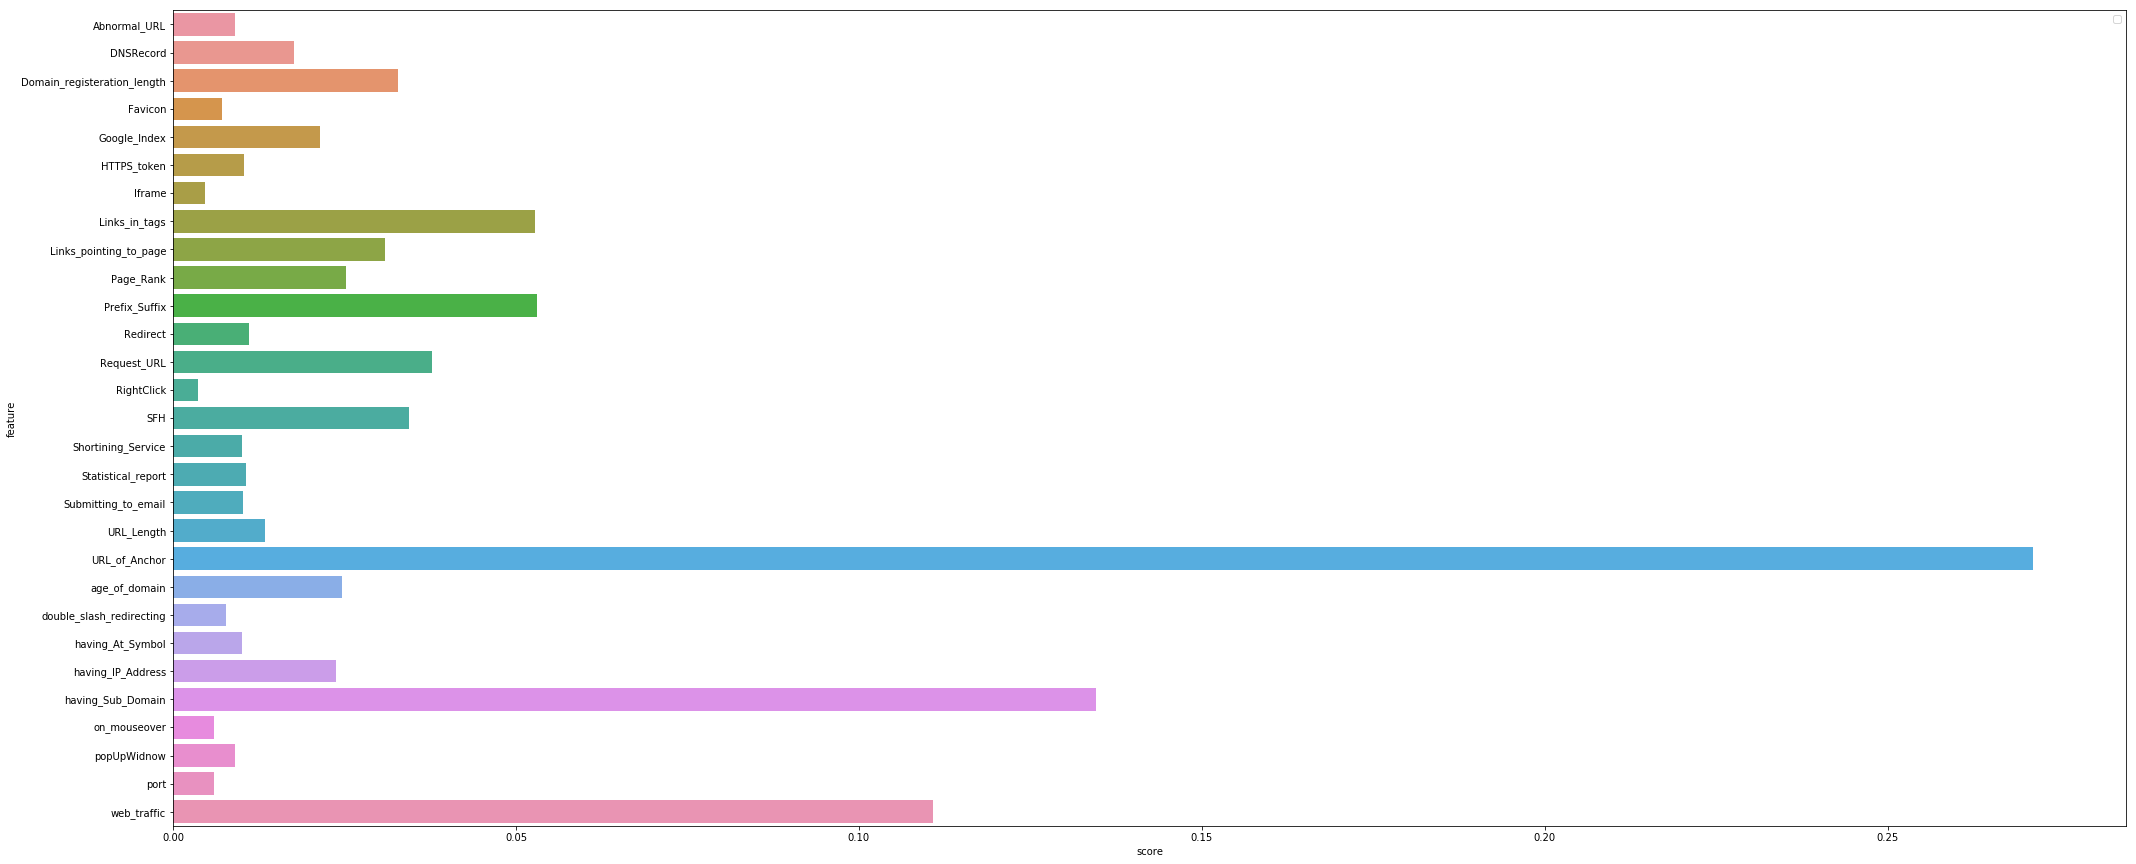

In [51]:
# suggestions from random forest tree
fi_rand = pd.DataFrame(sorted(zip(dataFrameFrequency.columns,
                            map(lambda x: round(x, 4), clf_rand.feature_importances_))), 
                       columns=['feature', 'score'])
fig, ax = plt.subplots(1, 1, figsize=(35, 15))
sns.barplot(x='score', y='feature', data=fi_rand, ax=ax)
ax.legend()

### features selection:

In [53]:
from sklearn import metrics

In [54]:
# function to train a model with train and test set, with selected features
# params:
#     model: model want to train (here we use classifier models)
#     trainX,trainY,testX,testY: dataframe
#     features: features that the model will be trained on
# output: 
#     trained model and evaluation report
def trainAndReportWithFeatures(model, trainX,trainY,testX,testY,features):
    trainedModel = model.fit(trainX[features],trainY)
    predictions = trainedModel.predict(testX[features])
#     report = classification_report(testY, predictions, output_dict=True)
    report = classification_report(testY, predictions)
    accuracy = metrics.accuracy_score(testY,predictions)
    rocAuc = metrics.roc_auc_score(testY,trainedModel.predict_proba(testX[features])[:, 1])
#     print(report)
    return (trainedModel,report,accuracy,rocAuc)

In [55]:
# function to train a model, with train and test set, under suggestion of another model, with selected feature amount
# params:
#     needTrainModel: model want to train (here we use decision tree)
#     trainedRFmodel: model to evaluate feature importances (here we use random forest tree)
#     trainX,trainY,testX,testY, dataframe : (input here so that data will not change)
#     n: amount of features that the model will be trained on, base on importance level
# output: 
#     trained model and evaluation report
def selectFeature(trainedRFmodel, needTrainModel ,dataFrame,trainX,trainY,testX,testY,n):
    fi_rand = pd.DataFrame(sorted(zip(dataFrame.columns,
                                 map(lambda x: round(x, 4), trainedRFmodel.feature_importances_))),
                           columns=['feature', 'score'])
    fi_rand = fi_rand.sort_values(by="score",ascending=False)
    fi_rand_filted = list(filter(lambda item: item != "Result", fi_rand["feature"].ravel()))
    if n > len(fi_rand_filted) : return (0,0)
    features = fi_rand_filted[:n]
    (trainedModel, report,accuracy,rocAuc) = trainAndReportWithFeatures(needTrainModel, trainX,trainY,testX,testY,features)
    print("features selected: ",features)
    print("report: ",report)
    print("accuracy: ",accuracy)
    print("roc auc score: ",rocAuc)
    return (trainedModel,report)

In [56]:
# 1 feature
a1= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,1)


features selected:  ['URL_of_Anchor']
report:                precision    recall  f1-score   support

   Not phish       0.99      0.59      0.74      1333
       Phish       0.75      1.00      0.86      1668

   micro avg       0.81      0.81      0.81      3001
   macro avg       0.87      0.79      0.80      3001
weighted avg       0.86      0.81      0.80      3001

accuracy:  0.8147284238587138
roc auc score:  0.8444251350607436


In [57]:
# 2 features
a2= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,2)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain']
report:                precision    recall  f1-score   support

   Not phish       0.99      0.59      0.74      1333
       Phish       0.75      1.00      0.86      1668

   micro avg       0.81      0.81      0.81      3001
   macro avg       0.87      0.79      0.80      3001
weighted avg       0.86      0.81      0.80      3001

accuracy:  0.8147284238587138
roc auc score:  0.8875361826068027


In [58]:
# 5 features
a5= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,5)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags']
report:                precision    recall  f1-score   support

   Not phish       0.87      0.82      0.84      1333
       Phish       0.86      0.90      0.88      1668

   micro avg       0.86      0.86      0.86      3001
   macro avg       0.86      0.86      0.86      3001
weighted avg       0.86      0.86      0.86      3001

accuracy:  0.8643785404865045
roc auc score:  0.9402784599027454


In [59]:
# 9 features
a9= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,9)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH', 'Domain_registeration_length', 'Links_pointing_to_page']
report:                precision    recall  f1-score   support

   Not phish       0.86      0.86      0.86      1333
       Phish       0.89      0.89      0.89      1668

   micro avg       0.88      0.88      0.88      3001
   macro avg       0.87      0.87      0.87      3001
weighted avg       0.88      0.88      0.88      3001

accuracy:  0.8750416527824059
roc auc score:  0.9430250998001297


In [60]:
# 20 features
a20= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,20)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH', 'Domain_registeration_length', 'Links_pointing_to_page', 'Page_Rank', 'age_of_domain', 'having_IP_Address', 'Google_Index', 'DNSRecord', 'URL_Length', 'Redirect', 'Statistical_report', 'HTTPS_token', 'Submitting_to_email', 'having_At_Symbol']
report:                precision    recall  f1-score   support

   Not phish       0.88      0.89      0.88      1333
       Phish       0.91      0.90      0.91      1668

   micro avg       0.90      0.90      0.90      3001
   macro avg       0.90      0.90      0.90      3001
weighted avg       0.90      0.90      0.90      3001

accuracy:  0.8967010996334556
roc auc score:  0.9166758865975487


In [61]:
# 27 features
a27= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,27)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH', 'Domain_registeration_length', 'Links_pointing_to_page', 'Page_Rank', 'age_of_domain', 'having_IP_Address', 'Google_Index', 'DNSRecord', 'URL_Length', 'Redirect', 'Statistical_report', 'HTTPS_token', 'Submitting_to_email', 'having_At_Symbol', 'Shortining_Service', 'popUpWidnow', 'Abnormal_URL', 'double_slash_redirecting', 'Favicon', 'port', 'on_mouseover']
report:                precision    recall  f1-score   support

   Not phish       0.88      0.90      0.89      1333
       Phish       0.92      0.91      0.91      1668

   micro avg       0.90      0.90      0.90      3001
   macro avg       0.90      0.90      0.90      3001
weighted avg       0.90      0.90      0.90      3001

accuracy:  0.9026991002999001
roc auc score:  0.9185657475519959


In [62]:
# 28 features
a28= selectFeature(clf_rand,clf_tree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,28)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH', 'Domain_registeration_length', 'Links_pointing_to_page', 'Page_Rank', 'age_of_domain', 'having_IP_Address', 'Google_Index', 'DNSRecord', 'URL_Length', 'Redirect', 'Statistical_report', 'HTTPS_token', 'Submitting_to_email', 'having_At_Symbol', 'Shortining_Service', 'popUpWidnow', 'Abnormal_URL', 'double_slash_redirecting', 'Favicon', 'port', 'on_mouseover', 'Iframe']
report:                precision    recall  f1-score   support

   Not phish       0.89      0.89      0.89      1333
       Phish       0.92      0.91      0.91      1668

   micro avg       0.90      0.90      0.90      3001
   macro avg       0.90      0.90      0.90      3001
weighted avg       0.90      0.90      0.90      3001

accuracy:  0.9040319893368877
roc auc score:  0.9189826683289528


### customize decisionTree

## using GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [64]:
def bestTreeGSCV(treeModel,trainX,trainY):
    maxDepths = range(5,30,5)
    minImpurityDecreeses = range(0,5)
    minSampleSplit = range(1,80)
    param_grid = {'criterion':['gini','entropy'], 
              'max_features' : ['log2','auto','sqrt',0.5,1.0],
              'max_depth' :maxDepths,
              'min_impurity_decrease' :[0.0,0.1,0.2,0.3],
              'min_samples_split': [5,10,30,50,80],
              'min_samples_leaf' : [5,10,30,50]
             }
    gs_inst = GridSearchCV(treeModel,param_grid=param_grid,cv=5, return_train_score=True)
    gs_inst.fit(trainX,trainY)
    return gs_inst.best_estimator_


In [65]:
bestTree = bestTreeGSCV(DecisionTreeClassifier(),trainFQ_X, trainFQ_y)
bestTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
best28features= selectFeature(clf_rand,bestTree,dataFrameFrequency,trainFQ_X, trainFQ_y, testFQ_X, testFQ_y,20)


features selected:  ['URL_of_Anchor', 'having_Sub_Domain', 'web_traffic', 'Prefix_Suffix', 'Links_in_tags', 'Request_URL', 'SFH', 'Domain_registeration_length', 'Links_pointing_to_page', 'Page_Rank', 'age_of_domain', 'having_IP_Address', 'Google_Index', 'DNSRecord', 'URL_Length', 'Redirect', 'Statistical_report', 'HTTPS_token', 'Submitting_to_email', 'having_At_Symbol']
report:                precision    recall  f1-score   support

   Not phish       0.87      0.87      0.87      1333
       Phish       0.90      0.90      0.90      1668

   micro avg       0.89      0.89      0.89      3001
   macro avg       0.89      0.89      0.89      3001
weighted avg       0.89      0.89      0.89      3001

accuracy:  0.886704431856048
roc auc score:  0.9520291493736746
